Note book para desarrollar funciones

In [1]:
#Se importan los paquetes basico necesarios
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
from IPython.display import Markdown as md #Este paquete sirve para escribir párrafos que se modifican automáticamente
import plotly
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import mapclassify
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from shapely.geometry import box

#Se centran los outputs para que después haya un mejor display
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

import warnings
warnings.filterwarnings('ignore')

#Esto garantiza que se puedan ver los objetos de plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

%config Completer.use_jedi = False
#The reason for this line of code is here https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working

#sys.prefix
sys.path.append('/Users/Daniel/OneDrive - C- ANALISIS SAS/programacion/funciones/')

#Estilos para pandas
pd.options.display.float_format = '{:,.2f}'.format

import mapas

paths = mapas.diccionario_rutas()

In [2]:
path_OneDrive='/Users/Daniel/OneDrive - C- ANALISIS SAS/'

In [3]:
paths = mapas.diccionario_rutas(path_OneDrive=path_OneDrive)
row= mapas.indice_municipio('05854', path_OneDrive=path_OneDrive)

In [32]:
municipios = {'Tibú':'54810', 
              'Valdivia': '05854',
              'La Montañita':'18410',
              'Puerto leguízamo':'86573',
             'Puerto Asís': '86568',
             'Florencia': '18001'}

<AxesSubplot:title={'center':'Mapa diagnóstico del municipio de Remedios, Antioquia (2020)'}>

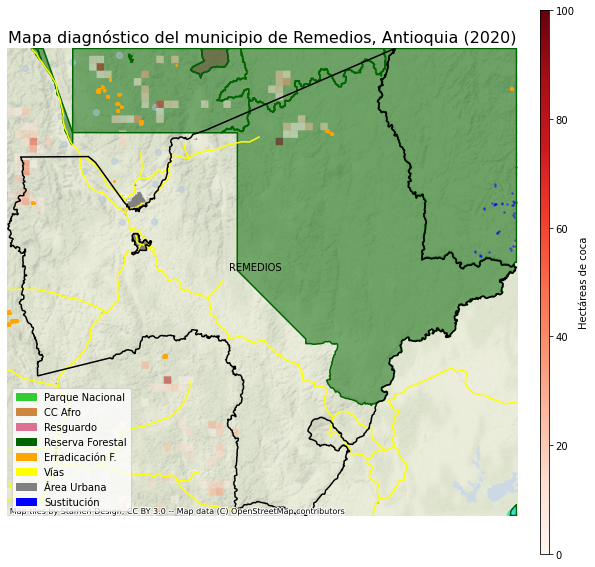

In [40]:
mapas.mapa_municipal('05604', año=2020, coca='coca20', emf_ano='2020', vrds=False, figsize=(10,10))

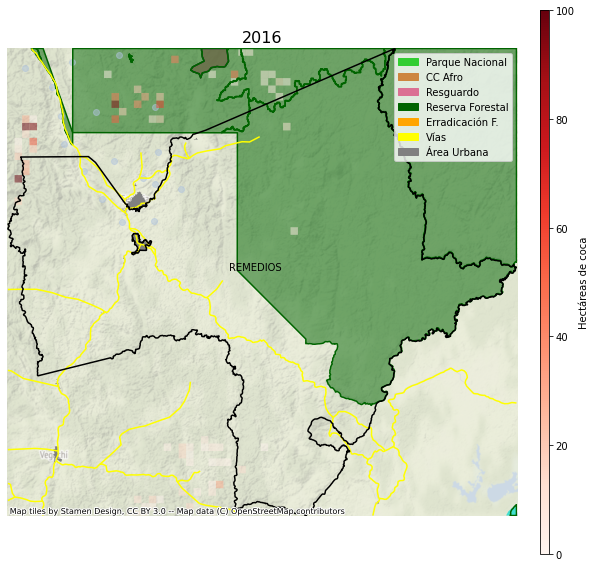

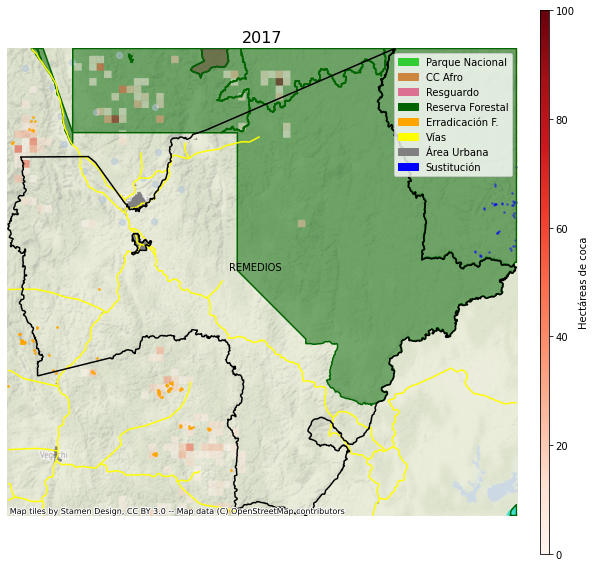

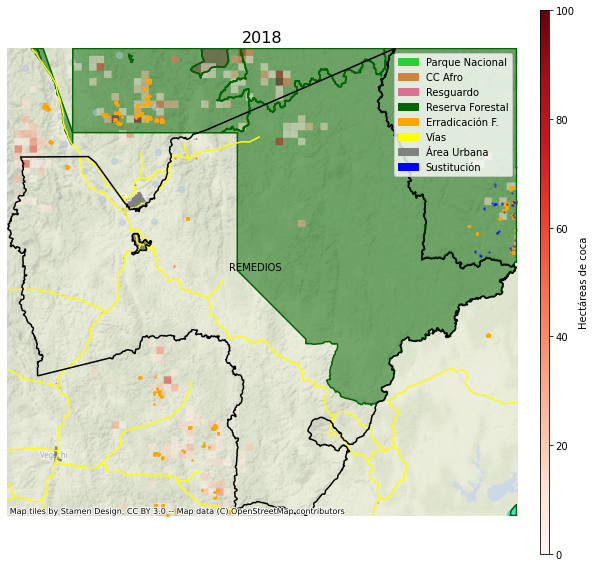

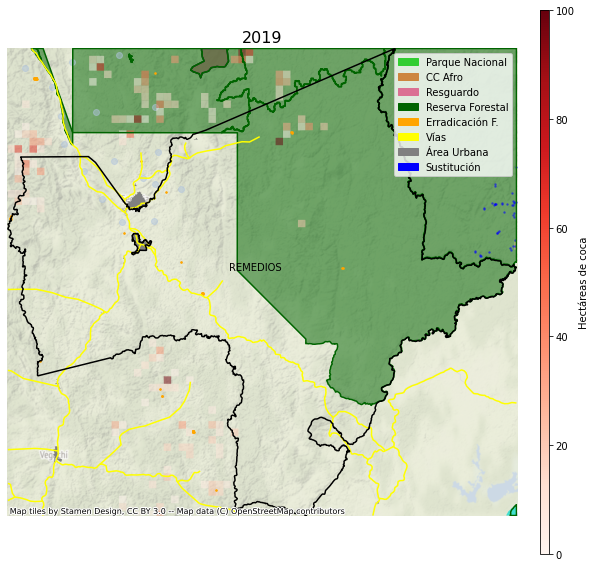

In [41]:
for i in range(2016, 2020):
    coca = 'coca'+str(i)[-2:]
    mapas.mapa_municipal('05604', año=i, vrds=False, coca=coca, emf_ano=str(i), figsize=(10,10), title=str(i));

In [14]:
#Cargar las regiones 

df = pd.read_excel(paths['panel_municipal_pgn'], skiprows=3, converters={'ID_MPIOS  (DANE)':str})
df['codane'] = df['ID_MPIOS  (DANE)'].apply(lambda x: '0'+str(x) if len(str(x))<5 else x) #Fix the municipal codes

In [15]:
bca = df[df['Nombre                                  del PDET']=='Bajo Cauca y nordeste antioqueno']['codane'].to_list()

In [16]:
mpios = mapas.cargar_capa_individual(paths['municipios'])

In [17]:
shp = mpios[mpios['DPTOMPIO'].isin(bca)] #GeoDataFrame que cubre los municipios de interés

<AxesSubplot:title={'center':'Mapa Diagnóstico Regional del Bajo Cauca - 2019'}>

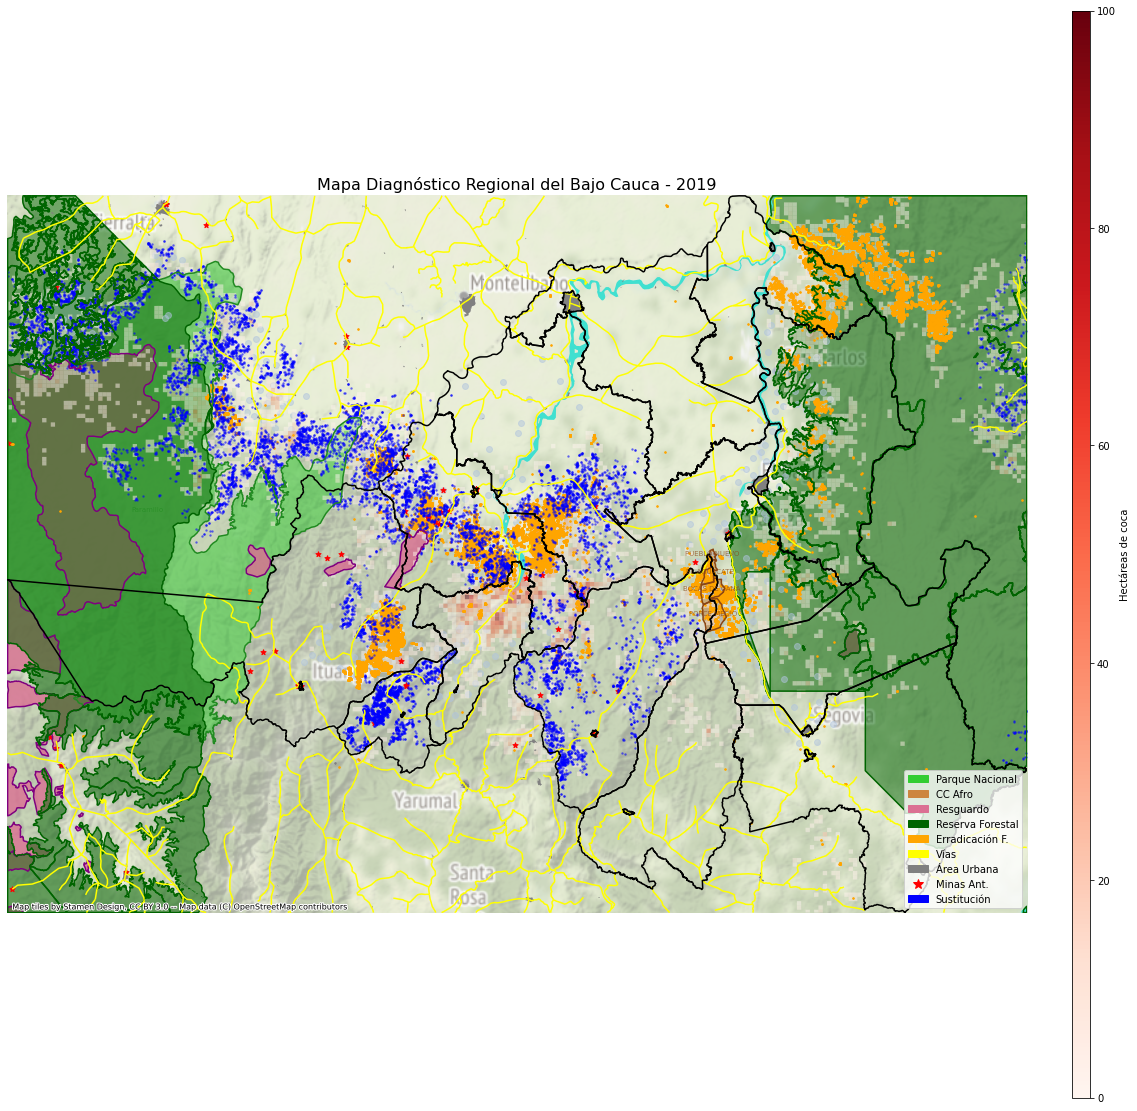

In [18]:
mapas.mapa_general(shp, title='Mapa Diagnóstico Regional del Bajo Cauca - 2019', vrds=False, figsize=(20,20))

## Explore contextily providers

In [19]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Hydda', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])

In [20]:
tiles = ctx.providers.Stamen

Toner
TonerBackground
TonerHybrid
TonerLines
TonerLabels
TonerLite
Watercolor
Terrain
TerrainBackground
TerrainLabels
TopOSMRelief
The layer does not exist
TopOSMFeatures
The layer does not exist


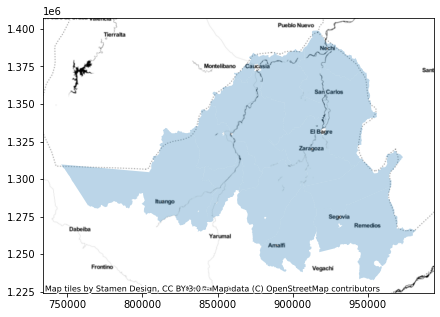

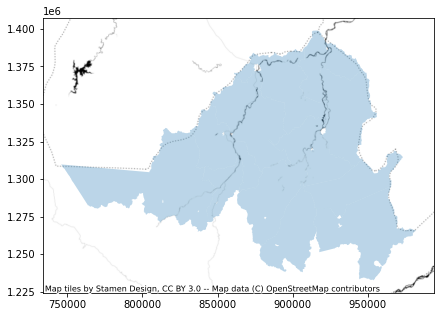

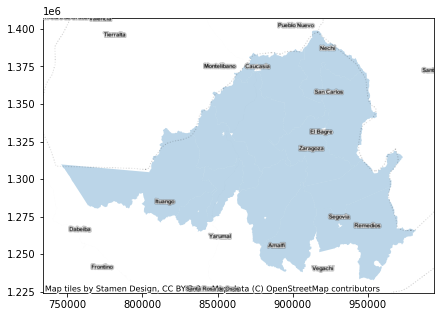

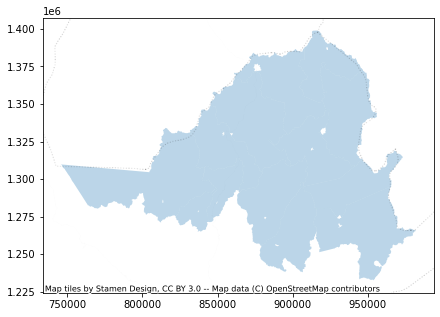

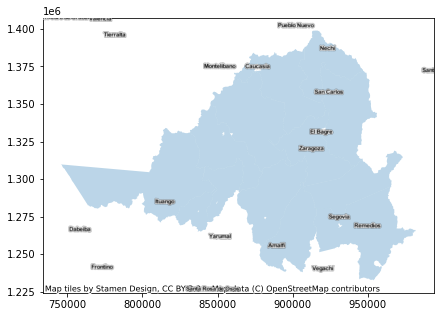

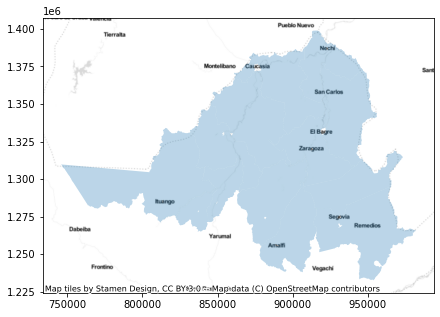

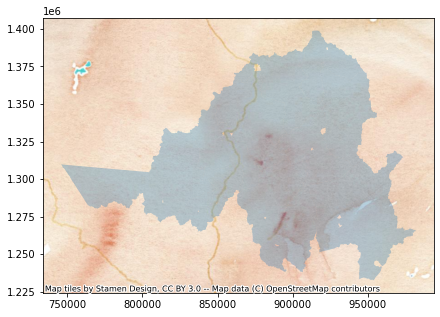

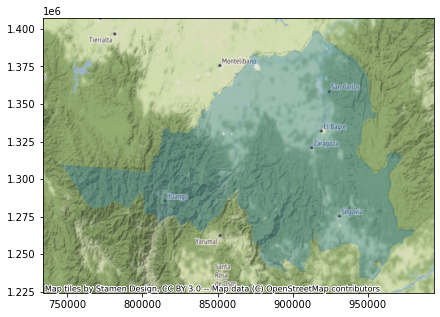

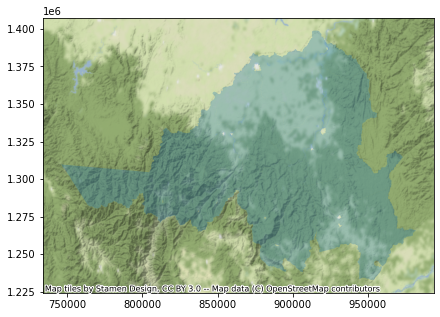

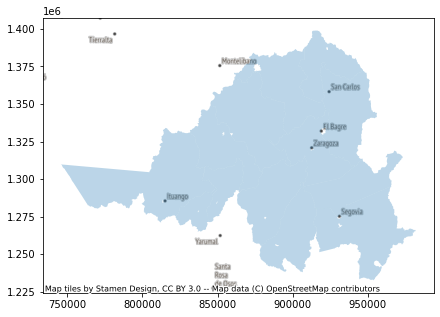

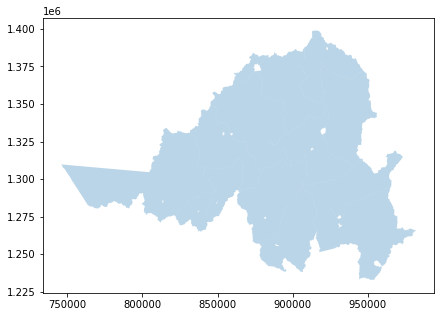

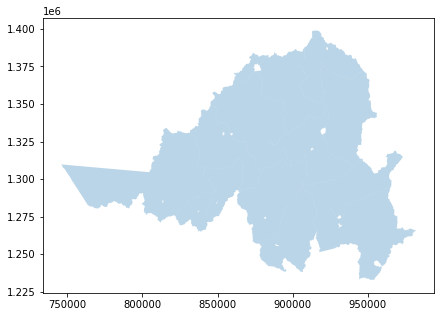

In [21]:
for i in tiles:
    print(i)
    try:
        ax = shp.plot(alpha=0.3, figsize=(7,7))
        ctx.add_basemap(ax=ax, source=tiles[i], crs=shp.crs.to_string())
    except:
        print('The layer does not exist')

In [43]:
pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 123.3 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [44]:
import reportlab

In [45]:
from reportlab.pdfgen import canvas

In [48]:
my_canvas = canvas.Canvas('reporte_municipal.pdf')

In [49]:
my_canvas.drawString(100, 750, "Welcome to Reportlab!")

In [50]:
my_canvas.save()